In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv("train.csv")
df.drop(columns=["Loan_ID"], inplace=True)

categorical_cols = ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numerical_cols = ["LoanAmount", "Loan_Amount_Term"]
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

df["Dependents"] = df["Dependents"].replace("3+", 3).astype(int)

label_enc_cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
numeric_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()

<ipython-input-2-187f3e70bcc3>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-2-187f3e70bcc3>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


In [ ]:
df.shape

(614, 13)

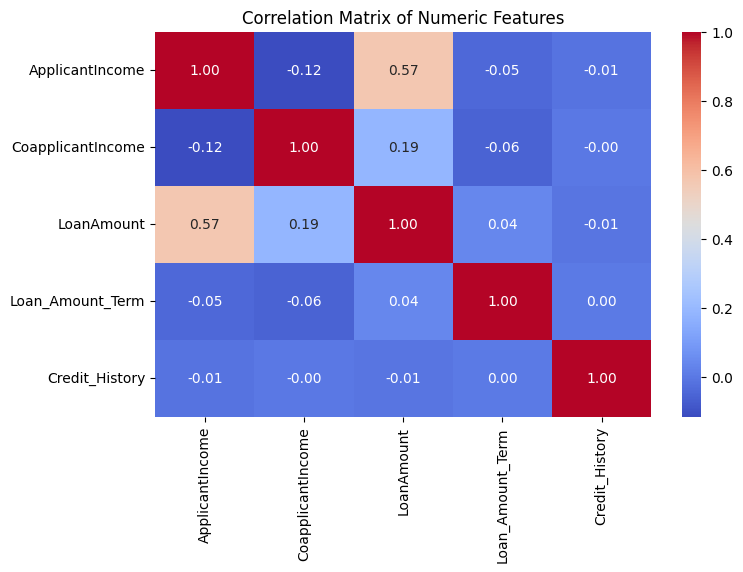

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df = df.select_dtypes(include=['number'])
corr_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('train.csv')
df['Married'] = df['Married'].fillna('Unknown')
fig = px.sunburst(
    df,
    path=['Married', 'Education', 'Loan_Status'],
    title='Hierarchical Breakdown of Married, Education, and Loan_Status',
)

fig.show()

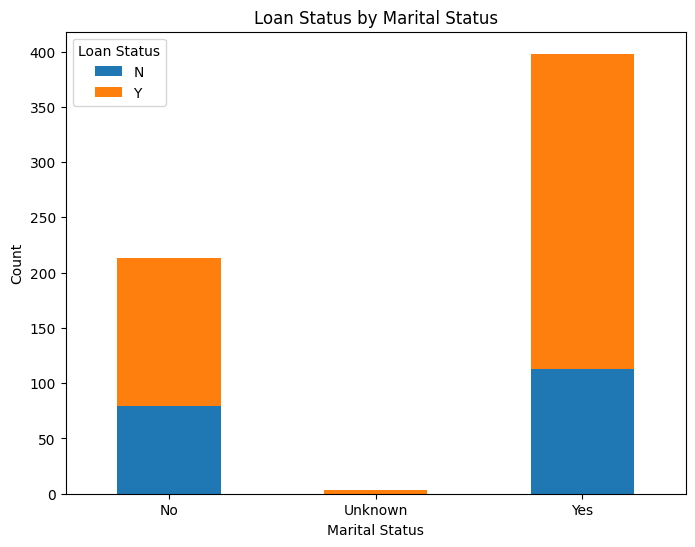

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df['Married'] = df['Married'].fillna('Unknown')
pd.crosstab(df['Married'], df['Loan_Status']).plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()


Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



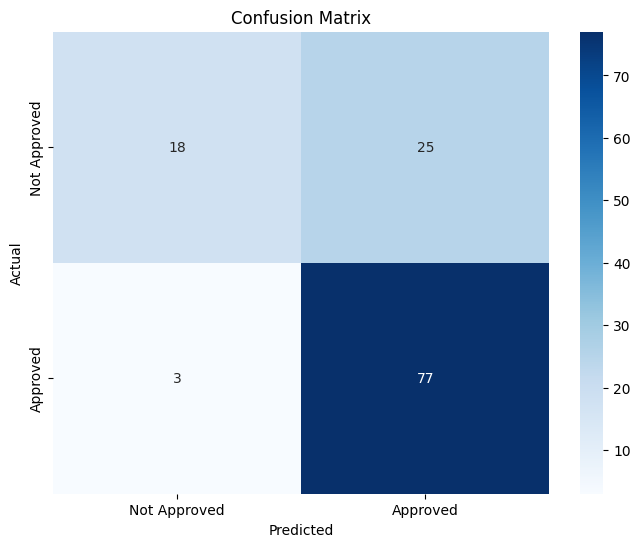

In [ ]:
#Random Forest Classifier and Visualization

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df = pd.read_csv('train.csv')
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# XGBoost

!pip install xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('train.csv')
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))



Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

           0       0.72      0.49      0.58        43
           1       0.77      0.90      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.75      0.76      0.74       123



In [ ]:
#Logistic Regression

import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('train.csv')
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))
X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)
y_pred = logreg_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Decision Trees

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('train.csv')
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.6910569105691057
              precision    recall  f1-score   support

           N       0.56      0.53      0.55        43
           Y       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



In [ ]:
#k-Nearest Neighbors
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('train.csv')
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6178861788617886
              precision    recall  f1-score   support

           N       0.36      0.12      0.18        43
           Y       0.65      0.89      0.75        80

    accuracy                           0.62       123
   macro avg       0.50      0.50      0.46       123
weighted avg       0.55      0.62      0.55       123



In [ ]:
# Support Vector Machine

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv('train.csv')
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
#naive bayes classifier

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('train.csv')
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           N       0.90      0.44      0.59        43
           Y       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



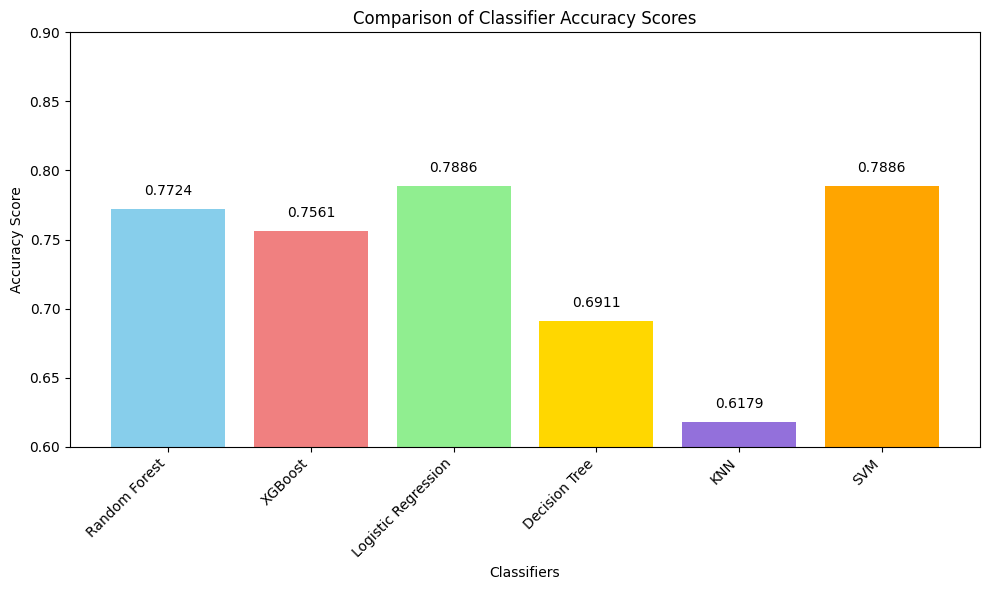

In [ ]:
import matplotlib.pyplot as plt
accuracy_scores = {
    'Random Forest': 0.7724,
    'XGBoost': 0.7561,
    'Logistic Regression': 0.7886,
    'Decision Tree': 0.6911,
    'KNN':  0.6179,
    'SVM': 0.7886
}

classifiers = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'mediumpurple', 'orange']
plt.figure(figsize=(10, 6))
plt.bar(classifiers, scores, color=colors)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Classifier Accuracy Scores")
plt.ylim(0.6, 0.9)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')

plt.tight_layout()
plt.show()
